# Visualizing the data

Importing Packages

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import fnmatch
import random

In [2]:
mask_path = "../../data/train/masks/"

Walking directory and storing pixels / ids

In [68]:
nWhitePixels = []
ids = []
for root, dir, files in os.walk(mask_path):
        for items in fnmatch.filter(files, "*"):
                im = Image.open(mask_path+items)
                nWhite = 0
                for pixel in im.getdata():
                    if (pixel != 0):
                        nWhite += 1
                nWhitePixels.append(nWhite)
                ids.append(items[:-4])
nWhitePixels = np.array(nWhitePixels)
ids = np.array(ids)

In [69]:
nWhitePer = nWhitePixels/(101*101)

In [70]:
print(nWhitePer)

[ 0.          0.03293795  0.         ...,  0.          0.08685423
  0.70453877]


Average Percent of Salted Pixels
0.24796586119


(array([ 5.34302377,  0.74257279,  0.5600549 ,  0.46254534,  0.56505539,
         0.51255025,  0.43504265,  0.37003627,  0.39753897,  0.61256005]),
 array([ 0.        ,  0.0999902 ,  0.19998039,  0.29997059,  0.39996079,
         0.49995099,  0.59994118,  0.69993138,  0.79992158,  0.89991177,
         0.99990197]),
 <a list of 10 Patch objects>)

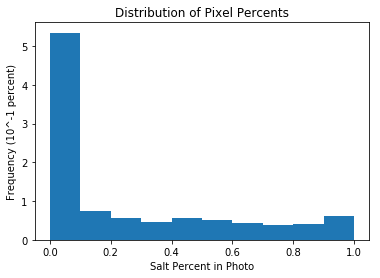

In [71]:
print ("Average Percent of Salted Pixels")
print (np.mean(nWhitePer))

plt.title("Distribution of Pixel Percents")
plt.xlabel("Salt Percent in Photo")
plt.ylabel("Frequency (10^-1 percent)")
plt.hist(nWhitePer, bins = 10, density = True)

Depths vs Salt Present

In [72]:
depths_path = "../../data/depths.csv"

In [73]:
depth_ids = []
depths = []
import csv
with open(depths_path) as csvfile:
    fieldnames = ['id', 'z']
    data = csv.DictReader(csvfile, fieldnames = fieldnames)
    for row in data:
        depth_ids.append(row['id'])
        depths.append(row['z'])

depth_ids = np.array(depth_ids[1:])
depths = np.array(depths[1:])

In [74]:
print(ids)
print(nWhitePer)

print(depth_ids)
print(depths)

['000e218f21' '003c477d7c' '00441f1cf2' ..., 'fff4eb4941' 'fff6522bd1'
 'fff987cdb3']
[ 0.          0.03293795  0.         ...,  0.          0.08685423
  0.70453877]
['4ac19fb269' '1825fadf99' 'f59821d067' ..., '68de95fb39' 'fdad2f99d8'
 'd7c57f676e']
['306' '157' '305' ..., '605' '309' '532']


In [89]:
per = []
z = []
for i in range (len (ids)):
    per.append(nWhitePer[i])
    z.append(int(depths[depth_ids == ids[i]][0]))

Text(0.5,0,'Depth (m?)')

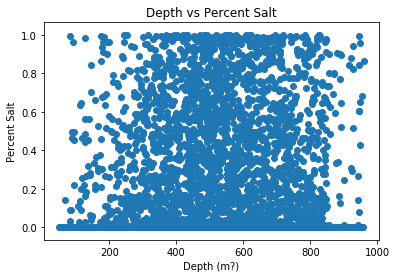

In [92]:
plt.scatter(z, per)
plt.title("Depth vs Percent Salt")
plt.ylabel("Percent Salt")
plt.xlabel("Depth (m?)")

Seeing Not Salt

In [8]:
images_path = "../../data/train/images/"

In [9]:
nExamples = 1
for i in range (nExamples):
    index = random.randrange(0, ids.size)
    im = Image.open(images_path+ids[index])
    mask = Image.open(mask_path+ids[index])
    im.show()
    mask.show()
    im.paste(mask, (0,0), mask.convert('L'))
    im.show()
    print(ids[index])


287b0f197f.png
